In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import scipy.optimize
import pandas as pd

In [97]:
def pdf(r):
    if (r <= 0):
        return 0
    else:
        return r * r / (1 + np.exp((r - 2) / 0.54))
    
area = scipy.integrate.quad(pdf, 0, 20)[0]

def pdf(r):
    return np.where(r < 0, 0, (r * r / (1 + np.exp((r - 2) / 0.54))) * 1 / area)

def ReadStepSizeFile(stepsize):
    data = pd.read_csv('../data/samples_' + str(stepsize) + '.txt', delim_whitespace=True, header=None)
    
    return data

In [98]:
headers = pd.read_csv('../data/statistics.txt', delim_whitespace=True, nrows=0).columns[1:]
stats = pd.read_csv('../data/statistics.txt', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(stats)

,Stepsize,Acceptance,Autocorrelation
0,0.01,0.995177,0.999882
1,0.02,0.990760,0.999481
2,0.03,0.986082,0.999004
3,0.04,0.981666,0.998165
4,0.05,0.976424,0.997412
...,...,...,...
495,4.96,0.167048,0.807356
496,4.97,0.165772,0.808361
497,4.98,0.166659,0.808897
498,4.99,0.165982,0.808623


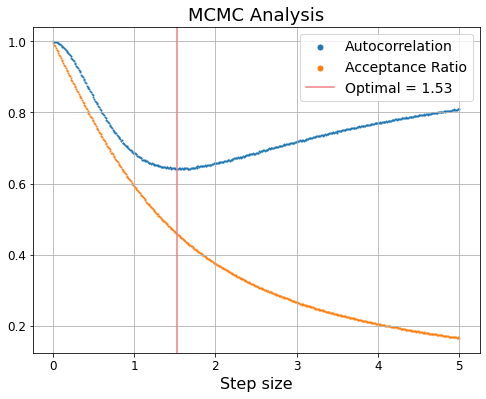

In [106]:
#def poly5(x, b, c, d, e, f):
#    return 1 + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5
#
#popt, pcov = scipy.optimize.curve_fit(poly5, stats['Stepsize'], stats['Autocorrelation'])
#optstepsize = scipy.optimize.minimize(poly5, 2, args=tuple(popt), bounds=[(min(stats['Stepsize']), max(stats['Stepsize']))])['x'][0]

optstepsize = stats['Stepsize'][np.argmin(stats['Autocorrelation'])]

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(stats['Stepsize'], stats['Autocorrelation'], s=1, label='Autocorrelation')
ax.scatter(stats['Stepsize'], stats['Acceptance'], s=1, label='Acceptance Ratio')

ax.axvline(optstepsize, c='lightcoral', label='Optimal = {:.2f}'.format(optstepsize))

ax.set_xlabel('Step size', fontsize=16)
ax.set_title('MCMC Analysis', fontsize=18)

ax.tick_params(axis='both', labelsize=12)

ax.grid()
legend = ax.legend(fontsize=14, markerscale=5)

fig.savefig('../results/r2GS_1.0.png', dpi=400, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

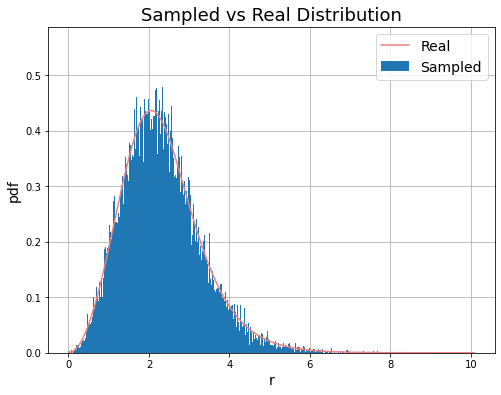

In [94]:
data = ReadStepSizeFile(230)

(bars, lims) = np.histogram(data[0], bins=int(data.shape[0] / 100), density=True)
centers = np.convolve(lims, np.ones(2) / 2, mode='valid')
binWidth = centers[1] - centers[0]


fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(min(0, np.min(lims)), max(6, np.max(lims)), 1000)
y = pdf(x)

ax.bar(centers, bars, width=binWidth, zorder=9, label='Sampled')
ax.plot(x, y, zorder=10, c='lightcoral', label='Real')

ax.set_xlabel('r', fontsize = 14)
ax.set_ylabel('pdf', fontsize = 14)
ax.set_title('Sampled vs Real Distribution', fontsize = 18)

ax.grid()
ax.legend(fontsize = 14)

plt.show()